<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/study/sklearn/titanic_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[titanic kaggle data](https://www.kaggle.com/competitions/titanic/data)

**전처리**

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
t_df = pd.read_csv('train.csv')
t_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [37]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
t_df['Age'].fillna(t_df['Age'].mean(), inplace=True)
t_df['Cabin'].fillna('N', inplace=True)
t_df['Embarked'].fillna('N', inplace=True)
t_df.isnull().sum().sum()

0

In [39]:
t_df['Cabin'] = t_df['Cabin'].str[:1] # 판다스 Series 문자열 추출 : .str[범위]
t_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

**데이터 분석**

In [40]:
t_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

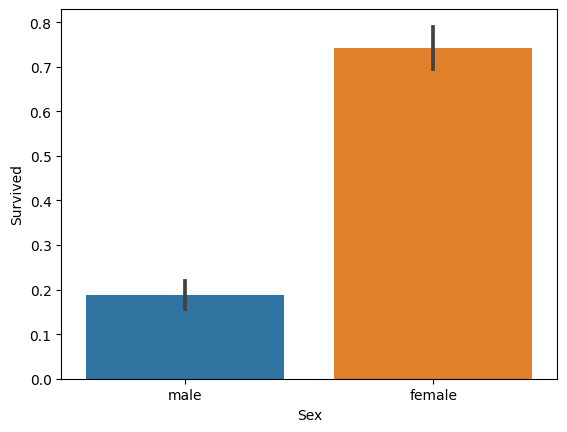

In [41]:
sns.barplot(x='Sex', y='Survived', data=t_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

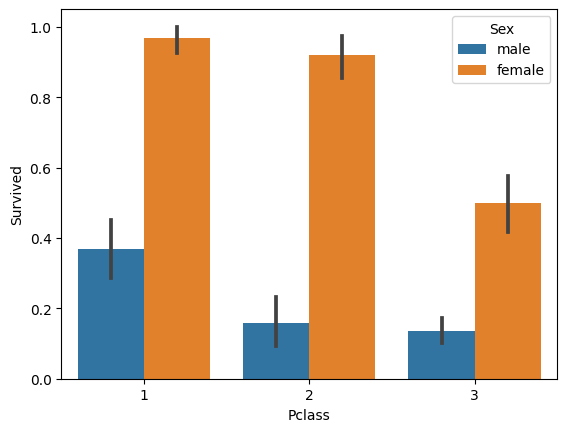

In [42]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=t_df)

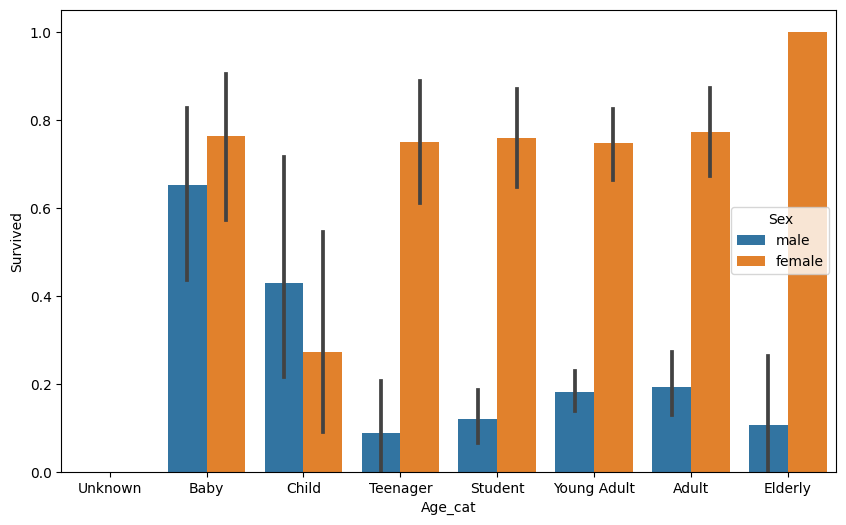

In [43]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat ='Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    return cat

plt.figure(figsize=(10, 6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

t_df['Age_cat'] = t_df['Age'].apply(lambda x : get_category(x))

sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=t_df, order=group_names)

t_df.drop('Age_cat', axis=1, inplace=True)

**전처리 2**

In [44]:
t_df.head(3)

## 문자열을 숫자로 인코딩 해야 할 필요가 있는 피쳐 고르기
# Sex
# Cabin
# Embarked
# Ticket은

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


In [45]:
from sklearn.preprocessing import LabelEncoder

def encoder_features(dataDF):
    features = ['Sex', 'Cabin', 'Embarked']
    le = LabelEncoder()
    for feature in features:
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

t_df = encoder_features(t_df)
t_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [46]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

drop_features(t_df)

**data split & train**

In [47]:
y_t_df = t_df['Survived']
X_t_df = t_df.drop('Survived', axis=1)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_t_df, y_t_df, test_size=0.2, random_state=11)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
scores = cross_val_score(dt_clf, X_t_df, y_t_df)
print(np.mean(scores))

0.7879291946519366
